### Model Training

ANN & CNN MODEL

###### V1: 5 EPOCHS
###### V2: 20 EPOCHS
###### V3: model fine tuning

#### Imports

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, Embedding, GlobalMaxPooling1D
from keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout, Input
from sklearn.metrics import confusion_matrix, classification_report

#### Train ANN model

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 1/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.8190 - loss: 0.3181 - val_accuracy: 0.9781 - val_loss: 0.0634
Epoch 2/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9852 - loss: 0.0517 - val_accuracy: 0.9802 - val_loss: 0.0582
Epoch 3/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9949 - loss: 0.0192 - val_accuracy: 0.9796 - val_loss: 0.0748
Epoch 4/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9978 - loss: 0.0079 - val_accuracy: 0.9798 - val_loss: 0.1050
Epoch 5/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9987 - loss: 0.0044 - val_accuracy: 0.9789 - val_loss: 0.1249
Epoch 6/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9998 - loss: 7.2007e-04 - val_accuracy: 0.9772 - val_loss: 0.1387
Epoch 7/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9984 - loss: 0.0070 - val_accuracy: 0.9801 - val_loss: 0.1240
Epoch 8/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9996 - loss: 0.001

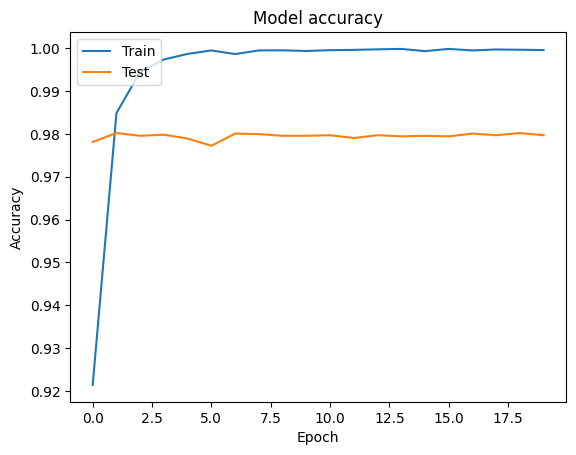

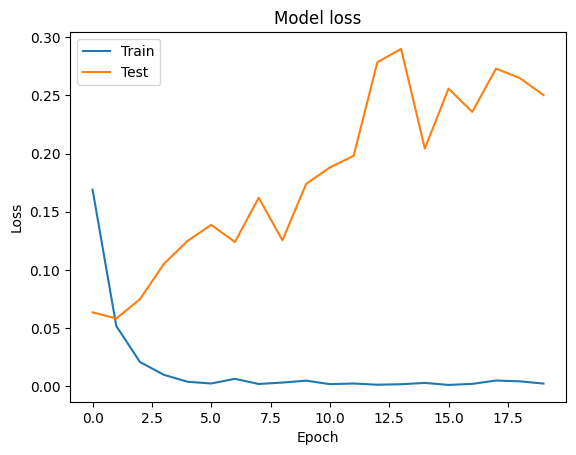

242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 928us/step - accuracy: 0.9814 - loss: 0.2178
Test Loss: 0.2503795027732849
Test Accuracy: 0.9796895384788513
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


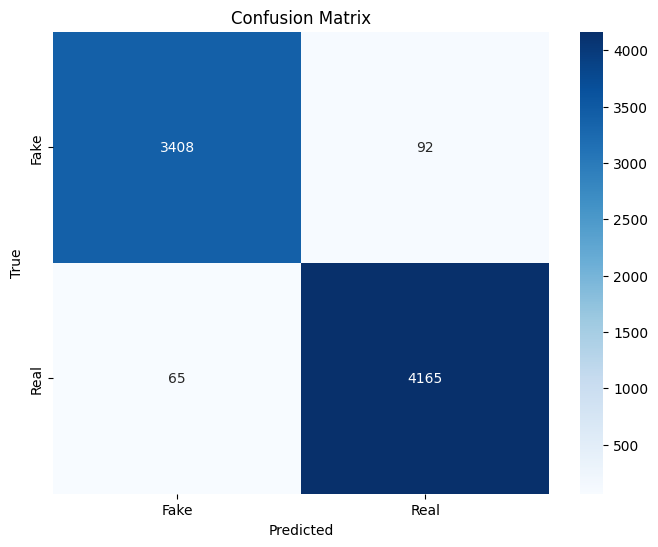

In [11]:
# Load the data
fake = pd.read_csv('./raw-data/raw-dataset-01/Fake.csv')
true = pd.read_csv('./raw-data/raw-dataset-01/True.csv')

# Give the fake news label 0
fake['label'] = 0

# Give the true news label 1
true['label'] = 1

# Drop unneeded columns
fake.drop(columns=["title", "date", "subject"], inplace=True)
true.drop(columns=["title", "date", "subject"], inplace=True)

# Combine the datasets
news = pd.concat([fake, true], ignore_index=True)

# Check for cleaning data
news.drop_duplicates(inplace=True)

# Preprocess the text data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if len(word) > 3]
    indices = np.unique(words, return_index=True)[1]
    cleaned_text = np.array(words)[np.sort(indices)].tolist()
    return cleaned_text

# Separate the text and labels
x = news.drop('label', axis=1)
y = news.label

# Process the texts
texts = list(x['text'])
cleaned_text = [process_text(text) for text in texts]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index
vocab_size = len(word_idx) + 1

# Save the tokenizer
with open('./models/ann-tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

maxlen = 150
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to categorical format
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

# Build the ANN model
model = Sequential()
model.add(Input(shape=(maxlen,)))
model.add(Embedding(vocab_size, 100))
model.add(GlobalMaxPooling1D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=20, validation_data=(X_test, y_test_one_hot), batch_size=32)

# Save the trained model
model.save('./models/ann-model-v2.h5')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Confusion matrix
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#### Train CNN model

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 1/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 26s 26ms/step - accuracy: 0.8300 - loss: 0.2987 - val_accuracy: 0.9651 - val_loss: 0.0881
Epoch 2/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9904 - loss: 0.0328 - val_accuracy: 0.9749 - val_loss: 0.0637
Epoch 3/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9973 - loss: 0.0101 - val_accuracy: 0.9765 - val_loss: 0.1471
Epoch 4/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9992 - loss: 0.0034 - val_accuracy: 0.9770 - val_loss: 0.1326
Epoch 5/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.9988 - loss: 0.0048 - val_accuracy: 0.9736 - val_loss: 0.0950
Epoch 6/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.9986 - loss: 0.0061 - val_accuracy: 0.9758 - val_loss: 0.1142
Epoch 7/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 27s 27ms/step - accuracy: 0.9985 - loss: 0.0042 - val_accuracy: 0.9696 - val_loss: 0.1542
Epoch 8/20
967/967 ━━━━━━━━━━━━━━━━━━━━ 26s 27ms/step - accuracy: 0.9992 - loss: 0.0039 - 

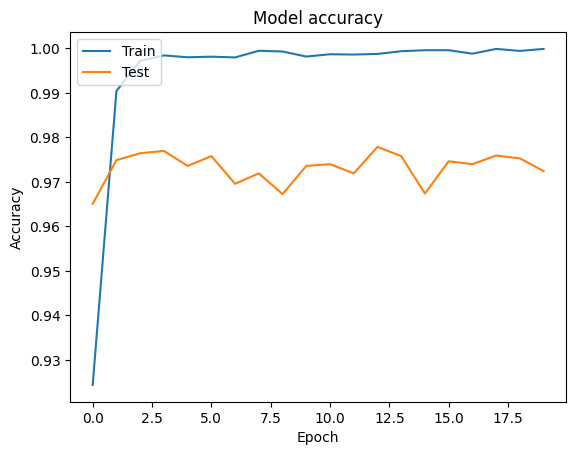

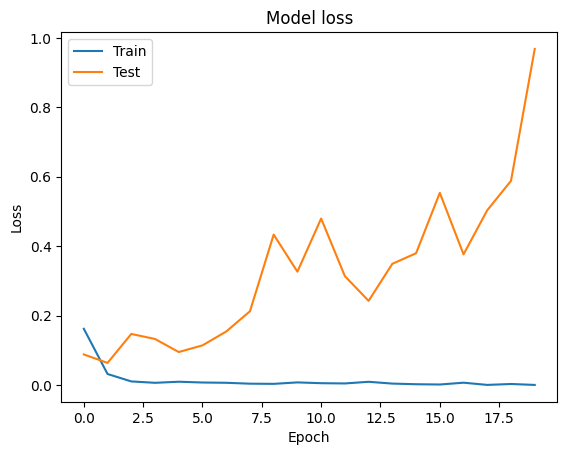

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9716 - loss: 1.0307
Test Loss: 0.96831214427948
Test Accuracy: 0.972445011138916
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


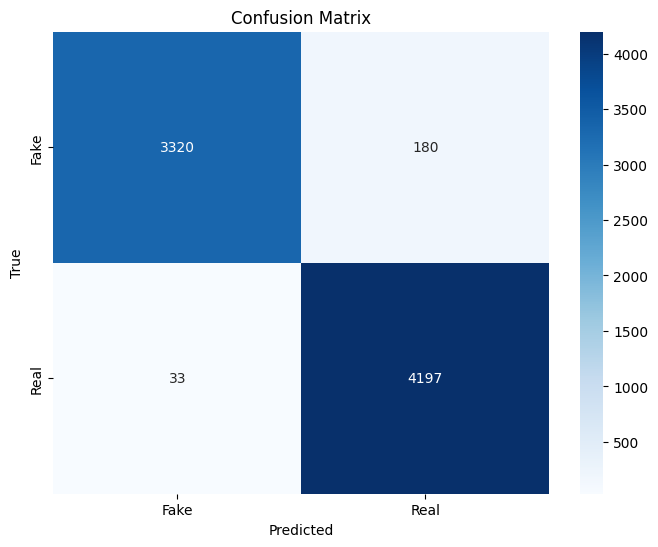

              precision    recall  f1-score   support

        Fake       0.99      0.95      0.97      3500
        Real       0.96      0.99      0.98      4230

    accuracy                           0.97      7730
   macro avg       0.97      0.97      0.97      7730
weighted avg       0.97      0.97      0.97      7730



In [13]:
# Load the data
fake = pd.read_csv('./raw-data/raw-dataset-01/Fake.csv')
true = pd.read_csv('./raw-data/raw-dataset-01/True.csv')

# Give the fake news label 0
fake['label'] = 0

# Give the true news label 1
true['label'] = 1

# Drop unneeded columns
fake.drop(columns=["title", "date", "subject"], inplace=True)
true.drop(columns=["title", "date", "subject"], inplace=True)

# Combine the datasets
news = pd.concat([fake, true], ignore_index=True)

# Check for cleaning data
news.drop_duplicates(inplace=True)

# Preprocess the text data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if len(word) > 3]
    indices = np.unique(words, return_index=True)[1]
    cleaned_text = np.array(words)[np.sort(indices)].tolist()
    return cleaned_text

# Separate the text and labels
x = news.drop('label', axis=1)
y = news.label

# Process the texts
texts = list(x['text'])
cleaned_text = [process_text(text) for text in texts]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_idx = tokenizer.word_index
vocab_size = len(word_idx) + 1

# Save the tokenizer
with open('./models/cnn-tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

maxlen = 150
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to categorical format
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

# Build the CNN model
model = Sequential()
model.add(Input(shape=(maxlen,)))
model.add(Embedding(vocab_size, 100))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=20, validation_data=(X_test, y_test_one_hot), batch_size=32)

# Save the trained model
model.save('./models/cnn-model-v2.h5')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Confusion matrix
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=['Fake', 'Real'])
print(report)

#### Adjusted ANN model

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 1/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.8173 - loss: 0.7204 - val_accuracy: 0.9592 - val_loss: 0.3181 - learning_rate: 0.0010
Epoch 2/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9565 - loss: 0.3115 - val_accuracy: 0.9710 - val_loss: 0.2084 - learning_rate: 0.0010
Epoch 3/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9735 - loss: 0.1991 - val_accuracy: 0.9736 - val_loss: 0.1547 - learning_rate: 0.0010
Epoch 4/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9772 - loss: 0.1411 - val_accuracy: 0.9732 - val_loss: 0.1353 - learning_rate: 0.0010
Epoch 5/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9811 - loss: 0.1073 - val_accuracy: 0.9706 - val_loss: 0.1199 - learning_rate: 0.0010
Epoch 6/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9841 - loss: 0.0861 - val_accuracy: 0.9692 - val_loss: 0.1323 - learning_rate: 0.0010
Epoch 7/50
967/967 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9826 - l

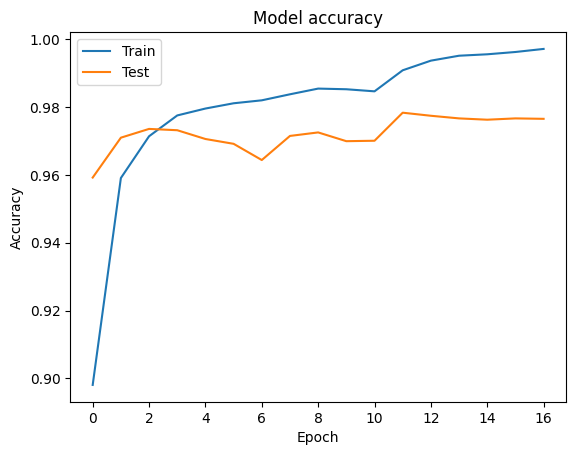

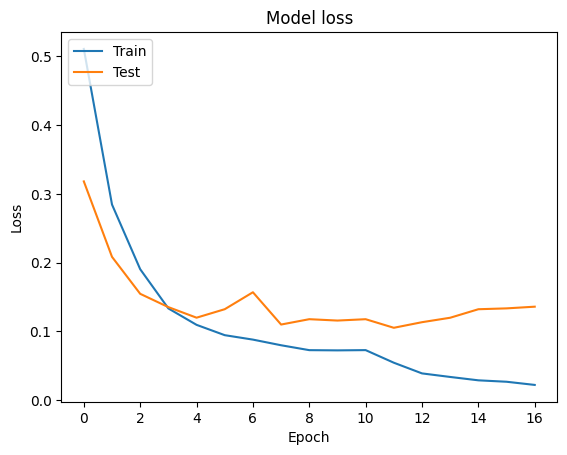

242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9808 - loss: 0.1007
Test Loss: 0.10526756197214127
Test Accuracy: 0.9783958792686462
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


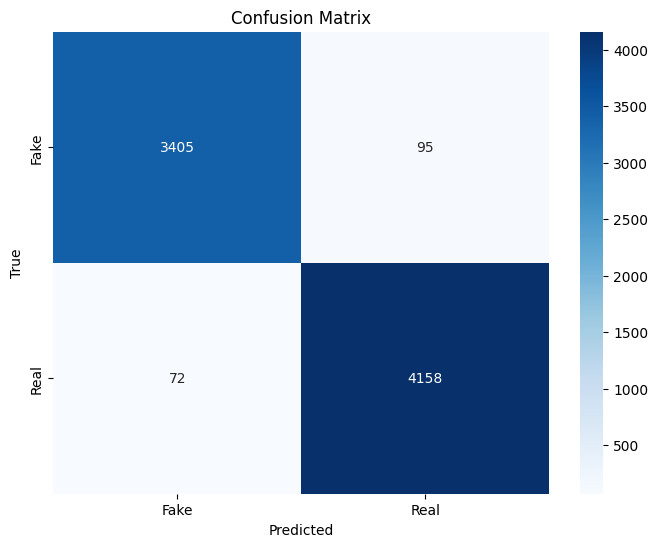

In [16]:
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load the data
fake = pd.read_csv('./raw-data/raw-dataset-01/Fake.csv')
true = pd.read_csv('./raw-data/raw-dataset-01/True.csv')

# Give the fake news label 0
fake['label'] = 0

# Give the true news label 1
true['label'] = 1

# Drop unneeded columns
fake.drop(columns=["title", "date", "subject"], inplace=True)
true.drop(columns=["title", "date", "subject"], inplace=True)

# Combine the datasets
news = pd.concat([fake, true], ignore_index=True)

# Check for cleaning data
news.drop_duplicates(inplace=True)

# Preprocess the text data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if len(word) > 3]
    indices = np.unique(words, return_index=True)[1]
    cleaned_text = np.array(words)[np.sort(indices)].tolist()
    return cleaned_text

# Separate the text and labels
x = news.drop('label', axis=1)
y = news.label

# Process the texts
texts = list(x['text'])
cleaned_text = [process_text(text) for text in texts]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

# Load the tokenizer
with open('./models/ann-tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

# Tokenize the text data
word_idx = tokenizer.word_index
vocab_size = len(word_idx) + 1

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

maxlen = 150
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert labels to categorical format
y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

# Build the ANN model
model = Sequential()
model.add(Input(shape=(maxlen,)))
model.add(Embedding(vocab_size, 100))
model.add(GlobalMaxPooling1D())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train the model
history = model.fit(X_train, y_train_one_hot, epochs=50, validation_data=(X_test, y_test_one_hot), batch_size=32, callbacks=[early_stopping, reduce_lr])

# Save the trained model
model.save('./models/ann-model-v3.h5')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_one_hot)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Confusion matrix
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [35]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.5.0
Datetime: 2024-05-31 16:22:03
Python Version: 3.12.1
-----------------------------------


# ------------------- SHOULD BE DELTED (WIP) --------------------

#### logistic regression model training

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


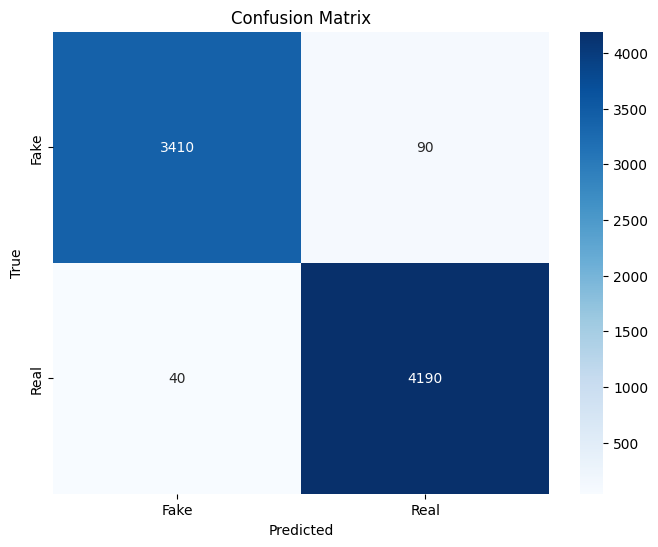

              precision    recall  f1-score   support

        Fake       0.99      0.97      0.98      3500
        Real       0.98      0.99      0.98      4230

    accuracy                           0.98      7730
   macro avg       0.98      0.98      0.98      7730
weighted avg       0.98      0.98      0.98      7730



In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the data
fake = pd.read_csv('./raw-data/raw-dataset-01/Fake.csv')
true = pd.read_csv('./raw-data/raw-dataset-01/True.csv')

# Give the fake news label 0
fake['label'] = 0

# Give the true news label 1
true['label'] = 1

# Drop unneeded columns
fake.drop(columns=["title", "date", "subject"], inplace=True)
true.drop(columns=["title", "date", "subject"], inplace=True)

# Combine the datasets
news = pd.concat([fake, true], ignore_index=True)

# Check for cleaning data
news.drop_duplicates(inplace=True)

# Preprocess the text data
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if len(word) > 3]
    return ' '.join(words)

# Apply preprocessing
news['cleaned_text'] = news['text'].apply(process_text)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(news['cleaned_text'], news['label'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Save the model and vectorizer
joblib.dump(model, './models/logistic_regression_model.pkl')
joblib.dump(vectorizer, './models/tfidf_vectorizer.pkl')

# Evaluate the model
y_pred = model.predict(X_test_tfidf)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test, y_pred, target_names=['Fake', 'Real'])
print(report)


#### RoBERTa model training

In [32]:
import os
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
import pandas as pd
import nltk
import re
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Ensure TensorFlow is not used
os.environ["USE_TF"] = "0"

# Check PyTorch availability
print("PyTorch version:", torch.__version__)
print("Is CUDA available:", torch.cuda.is_available())
print("Is PyTorch available:", torch.backends.cuda.is_built())

# Load the data
fake = pd.read_csv('./raw-data/raw-dataset-01/Fake.csv')
true = pd.read_csv('./raw-data/raw-dataset-01/True.csv')

# Give the fake news label 0
fake['label'] = 0

# Give the true news label 1
true['label'] = 1

# Drop unneeded columns
fake.drop(columns=["title", "date", "subject"], inplace=True)
true.drop(columns=["title", "date", "subject"], inplace=True)

# Combine the datasets
news = pd.concat([fake, true], ignore_index=True)

# Check for cleaning data
news.drop_duplicates(inplace=True)

# Preprocess the text data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    words = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    stop_words = set(stopwords.words("english"))
    words = [word for word in words if word not in stop_words]
    words = [word for word in words if len(word) > 3]
    return ' '.join(words)

# Apply preprocessing
news['cleaned_text'] = news['text'].apply(process_text)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(news['cleaned_text'], news['label'], test_size=0.2, random_state=42)

# Convert data to Hugging Face Dataset format
train_df = pd.DataFrame({'text': X_train, 'label': y_train})
test_df = pd.DataFrame({'text': X_test, 'label': y_test})

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

datasets = DatasetDict({
    'train': train_dataset,
    'test': test_dataset
})

# Tokenize the data
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True, max_length=150)

tokenized_datasets = datasets.map(tokenize_function, batched=True)

# Set the device to CPU explicitly
device = torch.device("cpu")
print("Using device:", device)

# Load the model and move it to the CPU device
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
model.to(device)
print("Model loaded and moved to device")

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    no_cuda=True  # Ensure no CUDA is used
)

# Define the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print("Test Loss:", results['eval_loss'])
print("Test Accuracy:", results['eval_accuracy'])

# Save the trained model
model.save_pretrained('./models/distilbert-model')
tokenizer.save_pretrained('./models/distilbert-model')

# Plotting and Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predict on the test set
predictions = trainer.predict(tokenized_datasets['test'])
y_pred_probs = torch.nn.functional.softmax(torch.tensor(predictions.predictions), dim=-1).numpy()
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = y_test.values

# Confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=['Fake', 'Real'])
print(report)


PyTorch version: 2.3.0
Is CUDA available: False
Is PyTorch available: False


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mariusaffolter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Users/mariusaffolter/.pyenv/versions/3.12.1/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Map: 100%|██████████| 7730/7730 [00:17<00:00, 446.11 examples/s]

Using device: cpu


ImportError: 
DistilBertForSequenceClassification requires the PyTorch library but it was not found in your environment.
However, we were able to find a TensorFlow installation. TensorFlow classes begin
with "TF", but are otherwise identically named to our PyTorch classes. This
means that the TF equivalent of the class you tried to import would be "TFDistilBertForSequenceClassification".
If you want to use TensorFlow, please use TF classes instead!

If you really do want to use PyTorch please go to
https://pytorch.org/get-started/locally/ and follow the instructions that
match your environment.
